In [5]:
import networkx as nx
from networkx.generators.atlas import *
import matplotlib.pyplot as plt
import random
from networkx.drawing.nx_agraph import graphviz_layout

In [6]:
atlas = graph_atlas_g()
# all graphs up to size 5
small_graphs = atlas[:53]

def accept_graph(graph, accepted_graphs):
    if nx.number_of_edges(graph) == 0:
        return False
    if nx.number_connected_components(graph) != 1:
        return False
    for a_graph in accepted_graphs:
        if nx.is_isomorphic(graph, a_graph):
            return False
    return True
        

# get only single-connected-component graphs
accepted_graphs = []
for graph in small_graphs:
    if accept_graph(graph, accepted_graphs):
        accepted_graphs.append(graph)

UU = nx.Graph()
for graph in accepted_graphs:
    UU = nx.disjoint_union(UU, graph)

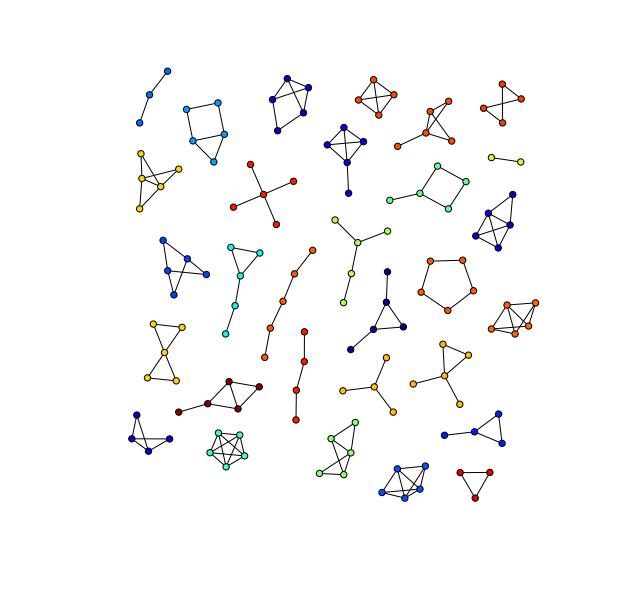

In [7]:
plt.figure(1,figsize=(8,8))
# layout graphs with positions using graphviz neato
pos=graphviz_layout(UU,prog="neato")
# color nodes the same in each connected subgraph
C=nx.connected_component_subgraphs(UU)
for g in C:
    c=[random.random()]*nx.number_of_nodes(g) # random color...
    nx.draw(g,
         pos,
         node_size=40,
         node_color=c,
         vmin=0.0,
         vmax=1.0,
         with_labels=False
         )
plt.show()

In [8]:
# add thresholds, update randomly
# we choose thresholds of 0, 1, 2 and assign all combinations
# for each combination we check to see if the graph-threshold combination *can* saturate
# if yes, we accept it
# then we run 100 simulations on each with random update orderings to see how many are mismeasured

30